In [2]:
HSK_1_VOCABULARY_PATH = "../../datasets/vocabulary/hsk1.txt"
HSK_2_VOCABULARY_PATH = "../../datasets/vocabulary/hsk2.txt"
HSK_3_VOCABULARY_PATH = "../../datasets/vocabulary/hsk3.txt"

In [3]:
import csv

def convert_tsv_to_txt(tsv_path, output_path):
    chinese_sentences = []
    
    # Read TSV file using csv module
    with open(tsv_path, 'r', encoding='utf-8') as tsv_file:
        tsv_reader = csv.reader(tsv_file, delimiter='\t')
        for row in tsv_reader:
            if len(row) >= 3 and row[1] == 'cmn':  # Check if row has enough columns and language is 'cmn'
                chinese_sentences.append(row[2])
    
    # Write to output file
    with open(output_path, 'w', encoding='utf-8') as f:
        for sentence in chinese_sentences:
            f.write(sentence + '\n')
    
    print(f"Converted {len(chinese_sentences)} Chinese sentences to {output_path}")

def read_hsk_vocabulary(path):

    """
    Read HSK vocabulary words from a file and return them as a list.
    
    Args:
        path (str): Path to the HSK vocabulary file
        
    Returns:
        list: List of HSK vocabulary words
    """
    vocabulary = []
    try:
        with open(path, 'r', encoding='utf-8') as f:
            for line in f:
                # Strip whitespace and skip empty lines
                word = line.strip()
                if word:
                    vocabulary.append(word)
        print(f"Successfully loaded {len(vocabulary)} words from {path}")
        return vocabulary
    except Exception as e:
        print(f"Error reading vocabulary file: {e}")
        return []



def filter_sentences_by_hsk_vocabulary(hsk_vocabulary, sentences_path):
    """
    Filter Chinese sentences to keep only those containing characters from the given HSK vocabulary.
    
    Args:
        hsk_vocabulary (list): List of HSK vocabulary words
        sentences_path (str): Path to the file containing Chinese sentences
        
    Returns:
        list: List of filtered sentences that only contain HSK vocabulary characters
    """
    # Create a set of all characters from HSK vocabulary for faster lookups
    hsk_chars = set()
    for word in hsk_vocabulary:
        hsk_chars.update(word)
    
    filtered_sentences = []
    total_sentences = 0
    
    try:
        with open(sentences_path, 'r', encoding='utf-8') as f:
            for line in f:
                sentence = line.strip()
                if not sentence:
                    continue
                    
                total_sentences += 1
                
                # Check if all characters in the sentence are in HSK vocabulary
                all_chars_in_hsk = True
                for char in sentence:
                    # Skip non-Chinese characters (punctuation, spaces, etc.)
                    if '\u4e00' <= char <= '\u9fff':  # Check if character is Chinese
                        if char not in hsk_chars:
                            all_chars_in_hsk = False
                            break
                
                if all_chars_in_hsk:
                    filtered_sentences.append(sentence)
        
        print(f"Processed {total_sentences} sentences")
        print(f"Found {len(filtered_sentences)} sentences containing only HSK vocabulary characters")
        return filtered_sentences
        
    except Exception as e:
        print(f"Error processing sentences file: {e}")
        return []

def extract_chinese_characters(input_path, output_path):
    """
    Extract only Chinese characters from a file with format: 'chinese\tpinyin\tenglish\tHSK level'
    
    Args:
        input_path (str): Path to the input file
        output_path (str): Path to save the output file with only Chinese characters
    """
    chinese_words = []
    
    try:
        with open(input_path, 'r', encoding='utf-8') as f:
            for line in f:
                # Split by tab and take the first element (Chinese characters)
                parts = line.strip().split('\t')
                if parts and parts[0]:  # Check if line is not empty and has Chinese characters
                    chinese_words.append(parts[0])
        
        # Write to output file
        with open(output_path, 'w', encoding='utf-8') as f:
            for word in chinese_words:
                f.write(word + '\n')
        
        print(f"Successfully extracted {len(chinese_words)} Chinese words to {output_path}")
        
    except Exception as e:
        print(f"Error processing file: {e}")

In [18]:
# convert_tsv_to_txt("../../datasets/raw/cmn_sentences.tsv", "../../datasets/raw/cmn_sentences.txt")

Converted 72171 Chinese sentences to ../../datasets/raw/cmn_sentences.txt


In [26]:
# Example usage
extract_chinese_characters("../../datasets/vocabulary/hsk/hsk3.txt", "../../datasets/vocabulary/hsk3.txt")

Successfully extracted 686 Chinese words to ../../datasets/vocabulary/hsk3.txt


In [16]:
read_hsk_vocabulary(HSK_1_VOCABULARY_PATH)

Successfully loaded 130 words from ../../datasets/vocabulary/hsk1.txt


['爱',
 '爸爸',
 '杯子',
 '北京',
 '本',
 '不错',
 '菜',
 '茶',
 '吃',
 '出租车',
 '打电话',
 '大',
 '点',
 '电脑',
 '电视',
 '电影',
 '东西',
 '读',
 '对',
 '多',
 '多少',
 '儿子',
 '饭店',
 '飞机',
 '高兴',
 '工作',
 '狗',
 '汉语',
 '好',
 '号',
 '喝',
 '很',
 '后面',
 '回',
 '会',
 '家',
 '叫',
 '今天',
 '开',
 '看',
 '看见',
 '块',
 '来',
 '老师',
 '冷',
 '里',
 '妈妈',
 '吗',
 '买',
 '猫',
 '没',
 '没关系',
 '米饭',
 '明天',
 '名字',
 '哪',
 '哪儿',
 '那',
 '呢',
 '能',
 '你',
 '年',
 '女儿',
 '朋友',
 '漂亮',
 '苹果',
 '钱',
 '前面',
 '请',
 '去',
 '热',
 '人',
 '认识',
 '商店',
 '上',
 '上午',
 '少',
 '谁',
 '什么',
 '时候',
 '是',
 '书',
 '水',
 '水果',
 '睡觉',
 '说',
 '岁',
 '他',
 '她',
 '太',
 '天气',
 '听',
 '同学',
 '喂',
 '我',
 '我们',
 '下',
 '下午',
 '下雨',
 '先生',
 '现在',
 '想',
 '小',
 '小姐',
 '些',
 '写',
 '谢谢',
 '星期',
 '学生',
 '学习',
 '学校',
 '一点儿',
 '衣服',
 '医生',
 '医院',
 '椅子',
 '有',
 '月',
 '在',
 '怎么',
 '怎么样',
 '这',
 '中国',
 '中午',
 '住',
 '桌子',
 '字',
 '昨天',
 '做',
 '坐']

In [40]:
import os

DATASET_PATH_LIST = [
    "../../datasets/raw/dian.txt",
    "../../datasets/raw/hsk_sentences.txt",
    "../../datasets/raw/cmn_sentences.txt"
]

HSK_1_VOCABULARY_PATH = "../../datasets/vocabulary/hsk1.txt"
HSK_2_VOCABULARY_PATH = "../../datasets/vocabulary/hsk2.txt"
HSK_3_VOCABULARY_PATH = "../../datasets/vocabulary/hsk3.txt"

TARGET_FOLDER = "../../datasets/hsk_sentences"


hsk_words = read_hsk_vocabulary(HSK_1_VOCABULARY_PATH)
filtered_sentences = filter_sentences_by_hsk_vocabulary(hsk_words, "../../datasets/raw/hsk_sentences.txt")

def collect_hsk_sentences(dataset_paths, hsk_paths, target_folder):
    """
    Collect sentences for each HSK level from multiple datasets and save them to separate files.
    
    Args:
        dataset_paths (list): List of paths to dataset files
        hsk_paths (dict): Dictionary mapping HSK levels to their vocabulary file paths
        target_folder (str): Path to save the filtered sentences
    """
    # Create target folder if it doesn't exist
    os.makedirs(target_folder, exist_ok=True)
    
    # Load HSK vocabularies
    hsk_vocabularies = {}
    for level, path in hsk_paths.items():
        hsk_vocabularies[level] = read_hsk_vocabulary(path)
    
    # Process each dataset
    for dataset_path in dataset_paths:
        print(f"\nProcessing dataset: {dataset_path}")
        
        # Filter sentences for each HSK level
        for level, vocabulary in hsk_vocabularies.items():
            print(f"\nFiltering for {level}...")
            filtered_sentences = filter_sentences_by_hsk_vocabulary(vocabulary, dataset_path)
            
            # Save filtered sentences
            output_path = os.path.join(target_folder, f"{level}.txt")
            with open(output_path, 'a', encoding='utf-8') as f:
                for sentence in filtered_sentences:
                    f.write(sentence + '\n')
            
            print(f"Saved {len(filtered_sentences)} sentences to {output_path}")

# Define HSK paths dictionary
hsk_paths = {
    'hsk1': HSK_1_VOCABULARY_PATH,
    'hsk2': HSK_2_VOCABULARY_PATH,
    'hsk3': HSK_3_VOCABULARY_PATH
}

# Run the collection process
collect_hsk_sentences(DATASET_PATH_LIST, hsk_paths, TARGET_FOLDER)

Successfully loaded 162 words from ../../datasets/vocabulary/hsk1.txt
Processed 18896 sentences
Found 29 sentences containing only HSK vocabulary characters
Successfully loaded 162 words from ../../datasets/vocabulary/hsk1.txt
Successfully loaded 309 words from ../../datasets/vocabulary/hsk2.txt
Successfully loaded 686 words from ../../datasets/vocabulary/hsk3.txt

Processing dataset: ../../datasets/raw/dian.txt

Filtering for hsk1...
Processed 200 sentences
Found 67 sentences containing only HSK vocabulary characters
Saved 67 sentences to ../../datasets/hsk_sentences/hsk1.txt

Filtering for hsk2...
Processed 200 sentences
Found 140 sentences containing only HSK vocabulary characters
Saved 140 sentences to ../../datasets/hsk_sentences/hsk2.txt

Filtering for hsk3...
Processed 200 sentences
Found 200 sentences containing only HSK vocabulary characters
Saved 200 sentences to ../../datasets/hsk_sentences/hsk3.txt

Processing dataset: ../../datasets/raw/hsk_sentences.txt

Filtering for hsk

## Generate fill-in-the-gaps dataset

In [44]:
import jieba
import json
import os
import re
from collections import defaultdict

def generate_fill_in_the_gaps_dataset(
    dataset_path,
    hsk_path,
    target_folder,
    max_word_frequency=500,
    per_word_limit_override=None
):
    per_word_limit_override = per_word_limit_override or {}

    # Load HSK words
    with open(hsk_path, "r", encoding="utf-8") as f:
        hsk_words = set(word.strip() for word in f if word.strip())

    # Load sentence data
    with open(dataset_path, "r", encoding="utf-8") as f:
        sentences = [line.strip() for line in f if line.strip()]

    word_usage_counter = defaultdict(int)
    dataset = []

    for sentence in sentences:
        # 🚫 Skip sentences with English letters
        if re.search(r"[a-zA-Z]", sentence):
            continue

        words = list(jieba.cut(sentence))
        for word in words:
            if word in hsk_words:
                limit = per_word_limit_override.get(word, max_word_frequency)
                if word_usage_counter[word] < limit:
                    dataset.append({
                        "prompt": f"请用词语“{word}”造句：",
                        "completion": sentence,
                        "word": word
                    })
                    word_usage_counter[word] += 1
                    break  # Only one word per sentence

    # Save to JSONL
    os.makedirs(target_folder, exist_ok=True)
    output_path = os.path.join(target_folder, "labeled_dataset.json")

    with open(output_path, "w", encoding="utf-8") as f:
        for example in dataset:
            json.dump(example, f, ensure_ascii=False)
            f.write("\n")

    print(f"✅ Saved {len(dataset)} samples to {output_path}")

In [45]:
generate_fill_in_the_gaps_dataset(
    dataset_path="../../datasets/hsk_sentences/hsk1.txt",
    hsk_path="../../datasets/vocabulary/hsk1.txt",
    target_folder="../../datasets/",
    max_word_frequency=500,  # Default limit
    per_word_limit_override={
        "了": 100,
        "是": 200,
        "我": 300,
        "的": 200,
    }
)

✅ Saved 18354 samples to ../../datasets/labeled_dataset.json


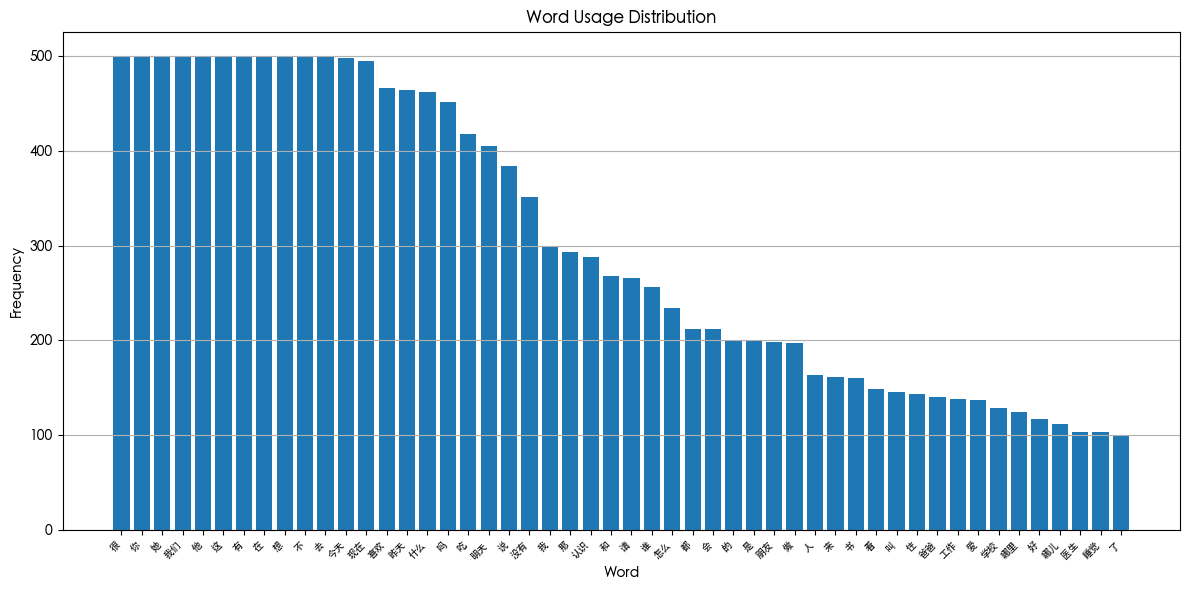

{'很': 500, '你': 500, '她': 500, '我们': 500, '他': 500, '这': 500, '有': 500, '在': 500, '想': 500, '不': 500, '去': 500, '今天': 498, '现在': 495, '喜欢': 466, '昨天': 464, '什么': 462, '吗': 452, '吃': 418, '明天': 405, '说': 384, '没有': 351, '我': 300, '那': 293, '认识': 288, '和': 268, '请': 266, '谁': 256, '怎么': 234, '都': 212, '会': 212, '的': 200, '是': 200, '朋友': 198, '做': 197, '人': 164, '来': 161, '书': 160, '看': 149, '叫': 146, '住': 143, '爸爸': 140, '工作': 138, '爱': 137, '学校': 129, '哪里': 125, '好': 117, '哪儿': 112, '医生': 103, '睡觉': 103, '了': 100, '喝': 94, '猫': 93, '“': 92, '买': 89, '狗': 82, '怎么样': 81, '呢': 81, '听': 80, '写': 79, '个': 77, '谢谢': 74, '哪': 72, '学生': 72, '中国': 72, '老师': 69, '多少': 67, '能': 67, '儿子': 67, '下': 66, '对不起': 65, '天气': 63, '下雨': 59, '多': 59, '高兴': 56, '下午': 55, '汉语': 54, '没关系': 53, '苹果': 53, '学习': 52, '再见': 48, '女儿': 48, '妈妈': 45, '钱': 45, '飞机': 42, '看见': 41, '为': 41, '时候': 40, '冷': 40, '坐': 36, '岁': 36, '医院': 34, '东西': 33, '桌子': 33, '读': 32, '一': 31, '杯子': 29, '.': 28, '?': 27, '名字': 26, '年': 24, '

In [53]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib
import platform

def set_chinese_font():
    system = platform.system()
    if system == 'Windows':
        matplotlib.rcParams['font.family'] = 'Microsoft YaHei'
    elif system == 'Darwin':  # macOS
        matplotlib.rcParams['font.family'] = 'Heiti TC'
    else:  # Linux
        matplotlib.rcParams['font.family'] = 'SimHei'

    # Avoid symbol issues
    matplotlib.rcParams['axes.unicode_minus'] = False

def count_word_usage(json_path):
    word_counts = defaultdict(int)

    with open(json_path, "r", encoding="utf-8") as f:
        for line in f:
            data = json.loads(line)
            word = data.get("word")
            if word:
                word_counts[word] += 1

    return dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

def plot_word_distribution(word_counts, top_n=30, title="Word Usage Distribution"):
    set_chinese_font()  # ✅ Ensure Chinese font is set

    top_items = list(word_counts.items())[:top_n]
    words, counts = zip(*top_items)

    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right', fontsize=7)
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.tight_layout()
    plt.grid(axis="y")
    plt.show()

json_path = "../../datasets/labeled_dataset.json"

# Count and plot
word_counts = count_word_usage(json_path)
plot_word_distribution(word_counts, top_n=50)

# statistics
print(word_counts)


## Generate masked dataset

In [9]:
import jieba
import json
import os

def generate_masked_task_dataset(dataset_path, hsk_path, target_folder):
    # Load HSK words
    with open(hsk_path, "r", encoding="utf-8") as f:
        hsk_words = set(word.strip() for word in f if word.strip())

    # Load sentence data
    with open(dataset_path, "r", encoding="utf-8") as f:
        sentences = [line.strip() for line in f if line.strip()]

    # Generate masked examples
    dataset = []
    for sentence in sentences:
        words = list(jieba.cut(sentence))
        for word in words:
            if word in hsk_words:
                # Replace first match only
                masked_sentence = sentence.replace(word, "[MASK]", 1)
                if masked_sentence != sentence:
                    dataset.append({
                        "input": masked_sentence,
                        "label": word
                    })
                    break

    # Save to JSONL
    os.makedirs(target_folder, exist_ok=True)
    output_path = os.path.join(target_folder, "masked_dataset.json")

    with open(output_path, "w", encoding="utf-8") as f:
        for example in dataset:
            json.dump(example, f, ensure_ascii=False)
            f.write("\n")

    print(f"✅ Saved {len(dataset)} masked samples to {output_path}")

generate_masked_task_dataset(
    dataset_path="../../datasets/hsk_sentences/hsk1.txt",
    hsk_path="../../datasets/vocabulary/hsk1.txt",
    target_folder="../../datasets/"
)

✅ Saved 13022 masked samples to ../../datasets/masked_dataset.json


In [6]:
import json
import os
import re

HSK_1_VOCABULARY_PATH = "../../datasets/vocabulary/hsk1.txt"
HSK_2_VOCABULARY_PATH = "../../datasets/vocabulary/hsk2.txt"
HSK_3_VOCABULARY_PATH = "../../datasets/vocabulary/hsk3.txt"

DATASET_PATH_LIST = [
    "../../datasets/raw/hsk_sentences.txt",
    "../../datasets/raw/cmn_sentences.txt"
]

def collect_hsk_sentences_with_labels(dataset_paths, hsk_paths, target_folder):
    """
    Collect sentences for each HSK level and create JSON files with labeled sentences.
    
    Args:
        dataset_paths (list): List of paths to dataset files
        hsk_paths (dict): Dictionary mapping HSK levels to their vocabulary file paths
        target_folder (str): Path to save the JSON files
    """
    # Create target folder if it doesn't exist
    os.makedirs(target_folder, exist_ok=True)

    PROCESS_EACH_HSK_WORD = False
    
    # Load HSK vocabularies
    hsk_vocabularies = {}
    for level, path in hsk_paths.items():
        hsk_vocabularies[level] = read_hsk_vocabulary(path)
    
    # Process each dataset
    for dataset_path in dataset_paths:
        print(f"\nProcessing dataset: {dataset_path}")
        
        # Filter sentences for each HSK level
        for level, vocabulary in hsk_vocabularies.items():
            print(f"\nFiltering for {level}...")
            filtered_sentences = filter_sentences_by_hsk_vocabulary(vocabulary, dataset_path)
            
            # Create JSON data
            json_data = []
            for sentence in filtered_sentences:
                if re.search(r'[a-zA-Z]', sentence):
                    continue
            
                # Find all HSK words in the sentence
                hsk_words_in_sentence = []
                for word in vocabulary:
                    if word in sentence:
                        hsk_words_in_sentence.append(word)
                
                if PROCESS_EACH_HSK_WORD:
                    if re.search(r'[a-zA-Z]', sentence):
                        continue
                    
                    for word in hsk_words_in_sentence:
                        # Create labeled sentence
                        labeled_sentence = ""
                        if hsk_words_in_sentence:
                            labeled_sentence = f"为词语“{word}”造句：{sentence}"
                        
                        # Create sentence object
                        sentence_obj = {
                            "hsk": int(level[-1]),  # Extract number from 'hsk1', 'hsk2', etc.
                            "original_sentence": sentence,
                            "labeled_sentence": labeled_sentence
                        }
                        json_data.append(sentence_obj)
                else:
                    # Create labeled sentence
                    labeled_sentence = ""
                    if hsk_words_in_sentence:
                        labeled_sentence = f"为词语“{hsk_words_in_sentence[0]}”造句：{sentence}"
                    
                    # Create sentence object
            
            # Save to JSON file
            output_path = os.path.join(target_folder, f"{level}.json")
            with open(output_path, 'w', encoding='utf-8') as f:
                json.dump(json_data, f, ensure_ascii=False, indent=2)
            
            print(f"Saved {len(json_data)} sentences to {output_path}")

# Define HSK paths dictionary
hsk_paths = {
    'hsk1': HSK_1_VOCABULARY_PATH,
    'hsk2': HSK_2_VOCABULARY_PATH,
    'hsk3': HSK_3_VOCABULARY_PATH
}

TARGET_FOLDER = "../../train_datasets/"

# Run the collection process
collect_hsk_sentences_with_labels(DATASET_PATH_LIST, hsk_paths, TARGET_FOLDER)

Successfully loaded 161 words from ../../datasets/vocabulary/hsk1.txt
Successfully loaded 308 words from ../../datasets/vocabulary/hsk2.txt
Successfully loaded 686 words from ../../datasets/vocabulary/hsk3.txt

Processing dataset: ../../datasets/raw/hsk_sentences.txt

Filtering for hsk1...
Processed 18896 sentences
Found 29 sentences containing only HSK vocabulary characters
Saved 0 sentences to ../../train_datasets/hsk1.json

Filtering for hsk2...
Processed 18896 sentences
Found 207 sentences containing only HSK vocabulary characters
Saved 0 sentences to ../../train_datasets/hsk2.json

Filtering for hsk3...
Processed 18896 sentences
Found 924 sentences containing only HSK vocabulary characters
Saved 0 sentences to ../../train_datasets/hsk3.json

Processing dataset: ../../datasets/raw/cmn_sentences.txt

Filtering for hsk1...
Processed 72171 sentences
Found 1933 sentences containing only HSK vocabulary characters
Saved 0 sentences to ../../train_datasets/hsk1.json

Filtering for hsk2...

## Approach 2
### Ask to generate sentence with gap